In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [22]:
datapath = "~/teigen_data/output_rows.csv"

In [23]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [24]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())
df

# df

Index([u'datetime', u'length [mm]', u'volume [mm^3]', u'surface [mm^2]',
       u'area volume [mm^3]', u'count []', u'numeric volume [mm^3]',
       u'numeric surface [mm^2]', u'length d. [mm^-2]', u'volume d. []',
       u'surface d. [mm^-1]', u'appearance noise_preview',
       u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'areasampling areasize_mm',
       u'areasampling areasize_px', u'areasampling voxelsize_mm',
       u'filepattern', u'generator_id',
       u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes r

,datetime,length [mm],volume [mm^3],surface [mm^2],area volume [mm^3],count [],numeric volume [mm^3],numeric surface [mm^2],length d. [mm^-2],volume d. [],...,postprocessing limit_negative_intensities,postprocessing measurement_resolution,postprocessing negative,postprocessing noise_amplitude,postprocessing noise_exponent,postprocessing noise_lambda_start,postprocessing noise_lambda_stop,postprocessing noise_mean,postprocessing noise_rng_seed,postprocessing output_dtype
0,2017-05-15T23:03:40.897552,0.000000,18717.965093,7041.118940,1100000.0,10.0,18365.006602,7517.588032,0.000000,0.017016,...,True,5,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
1,2017-05-15T23:03:42.213929,0.000000,6993.618192,3454.471993,1100000.0,10.0,6861.742162,3688.234642,0.000000,0.006358,...,True,5,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
2,2017-05-15T23:03:42.877958,0.000000,13735.554548,5734.524636,1100000.0,10.0,13476.545312,6122.576460,0.000000,0.012487,...,True,5,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
3,2017-05-15T23:03:43.610227,0.000000,8421.173448,3831.848959,1100000.0,10.0,8262.378784,4091.148413,0.000000,0.007656,...,True,5,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
4,2017-05-15T23:03:44.266326,0.000000,11058.386817,4820.521881,1100000.0,10.0,10849.861472,5146.723991,0.000000,0.010053,...,True,5,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
5,2017-05-15T23:03:44.991799,0.000000,18717.965093,7041.118940,1100000.0,10.0,18617.452688,7384.061241,0.000000,0.017016,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
6,2017-05-15T23:03:45.761736,0.000000,6993.618192,3454.471993,1100000.0,10.0,6956.062869,3622.724027,0.000000,0.006358,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
7,2017-05-15T23:03:46.460860,0.000000,13735.554548,5734.524636,1100000.0,10.0,13661.796346,6013.828216,0.000000,0.012487,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
8,2017-05-15T23:03:47.182766,0.000000,8421.173448,3831.848959,1100000.0,10.0,8375.953282,4018.481584,0.000000,0.007656,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8
9,2017-05-15T23:03:47.833345,0.000000,11058.386817,4820.521881,1100000.0,10.0,10999.004844,5055.308487,0.000000,0.010053,...,True,6,False,40.0,0.0001,0.1,3.0,30.0,0,uint8


# Numeric measurement precision (element_numer = 20, length_mean = 15)

,surface error [%],volume error [%],measurement_resolution
0,6.766951,1.885667,5
1,6.766957,1.885662,5
2,6.766940,1.885685,5
3,6.766954,1.885660,5
4,6.766946,1.885676,5
9,4.870564,0.536986,6
7,4.870562,0.536987,6
8,4.870563,0.536982,6
5,4.870565,0.536984,6
6,4.870557,0.536994,6


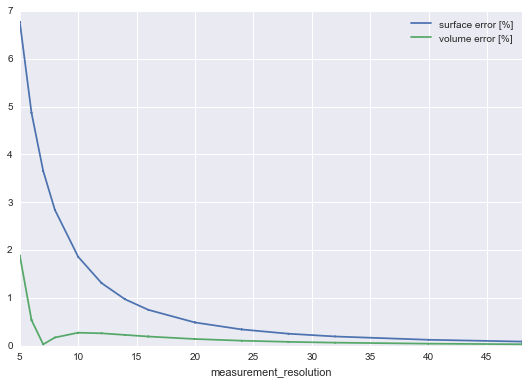

In [47]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]

dfs = df[
    df["output note"] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

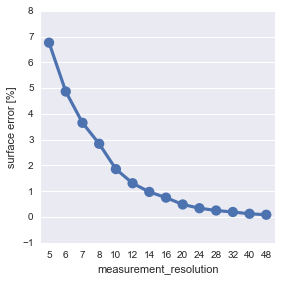

In [43]:

sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

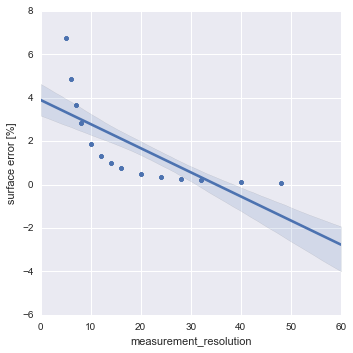

In [44]:

sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

ValueError: min() arg is an empty sequence

,surface error [%],volume error [%],measurement_resolution
70,10.063675,0.393345,5
90,10.063675,0.393345,5
120,10.063675,0.393345,5
91,9.293594,0.180768,5
92,9.344384,0.290978,5
93,9.921363,0.135436,5
94,9.740427,0.275778,5
124,9.740427,0.275778,5
123,9.921363,0.135436,5
122,9.344384,0.290978,5


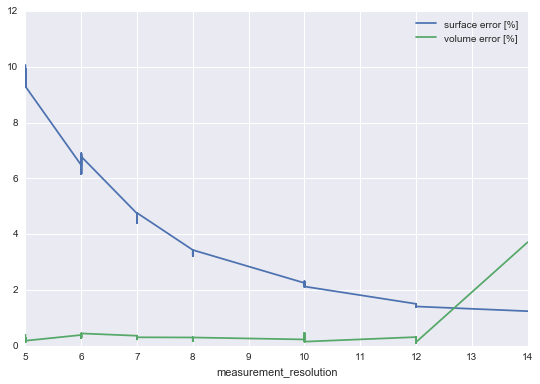

In [45]:
dfs = df[
    df["output note"] == "resolution tube"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

,surface error [%],volume error [%],length_distribution_mean
152,0.809811,1.895983,5.0
153,0.801124,2.003527,5.0
154,0.780103,1.641975,5.0
155,0.809811,1.895983,5.0
156,0.801124,2.003527,5.0
157,0.780103,1.641975,5.0
158,0.749268,1.866548,10.0
159,0.722467,1.929715,10.0
160,0.754444,1.968621,10.0
161,0.713241,1.929030,15.0


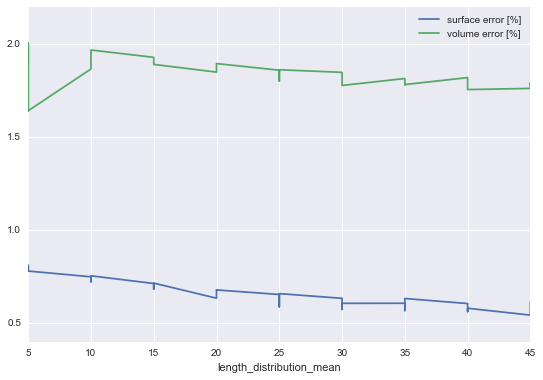

In [48]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["output note"] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
dfsp.plot(
    x="length_distribution_mean", **plotkw)
dfsp

In [31]:
import seaborn as sns

In [27]:
pd.__path__

['/Users/mjirik/miniconda/lib/python2.7/site-packages/pandas']

In [28]:
pd.__version__

u'0.20.1'

In [29]:
## element_number = 10, 

In [30]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected tubes length_distribution_mean"] == 17
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

TypeError: Empty 'DataFrame': no numeric data to plot

# Numeric and analytic error

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

## measurement_resolution = 25

In [ ]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["element_number"] = df["generators Unconnected tubes element_number"]
df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["measurement_resolution"] == 25
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]", "element_number", "length_distribution_mean", "radius_distribution_mean"]]
dfsp

In [ ]:

axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [ ]:
sns.

In [ ]:
axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [ ]:
axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [ ]:
dfsp.describe()

# Statistics

## Surface

In [ ]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfsp["surface [mm^2]"], y=dfsp["numeric surface [mm^2]"], correction=False, zero_method="pratt")

In [ ]:
scipy.stats.wilcoxon(dfsp["surface error [%]"], correction=False, zero_method="pratt")

In [ ]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfsp["surface [mm^2]"], dfsp["numeric surface [mm^2]"])

## Volume

In [ ]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfsp["volume [mm^3]"], y=dfsp["numeric volume [mm^3]"], correction=False, zero_method="pratt")

In [ ]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfsp["volume [mm^3]"], dfsp["numeric volume [mm^3]"])

In [49]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [ ]:
np.cos(np.pi/2)